In [31]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)

In [33]:
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


### Spy NAN values
White is NAN, black is finite value

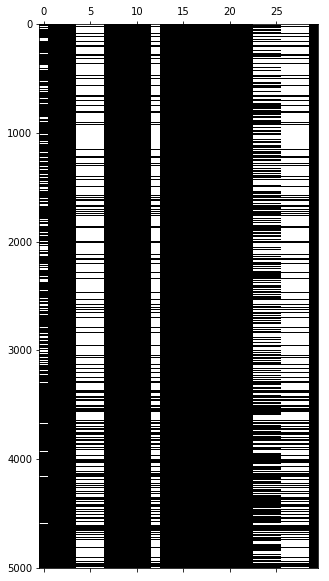

In [34]:
NAN_values_overview_matrix(tx, y)

### Feature Normalization

In [35]:
## TODO : remove NAN before standardization, or at least not consider them in np.mean() and np.std.
tx_nan = transform_to_nan(tx, -900)
tx_nan_norm, mean_x, std_x = standardize_with_nan(tx_nan)

### Feature Distribution

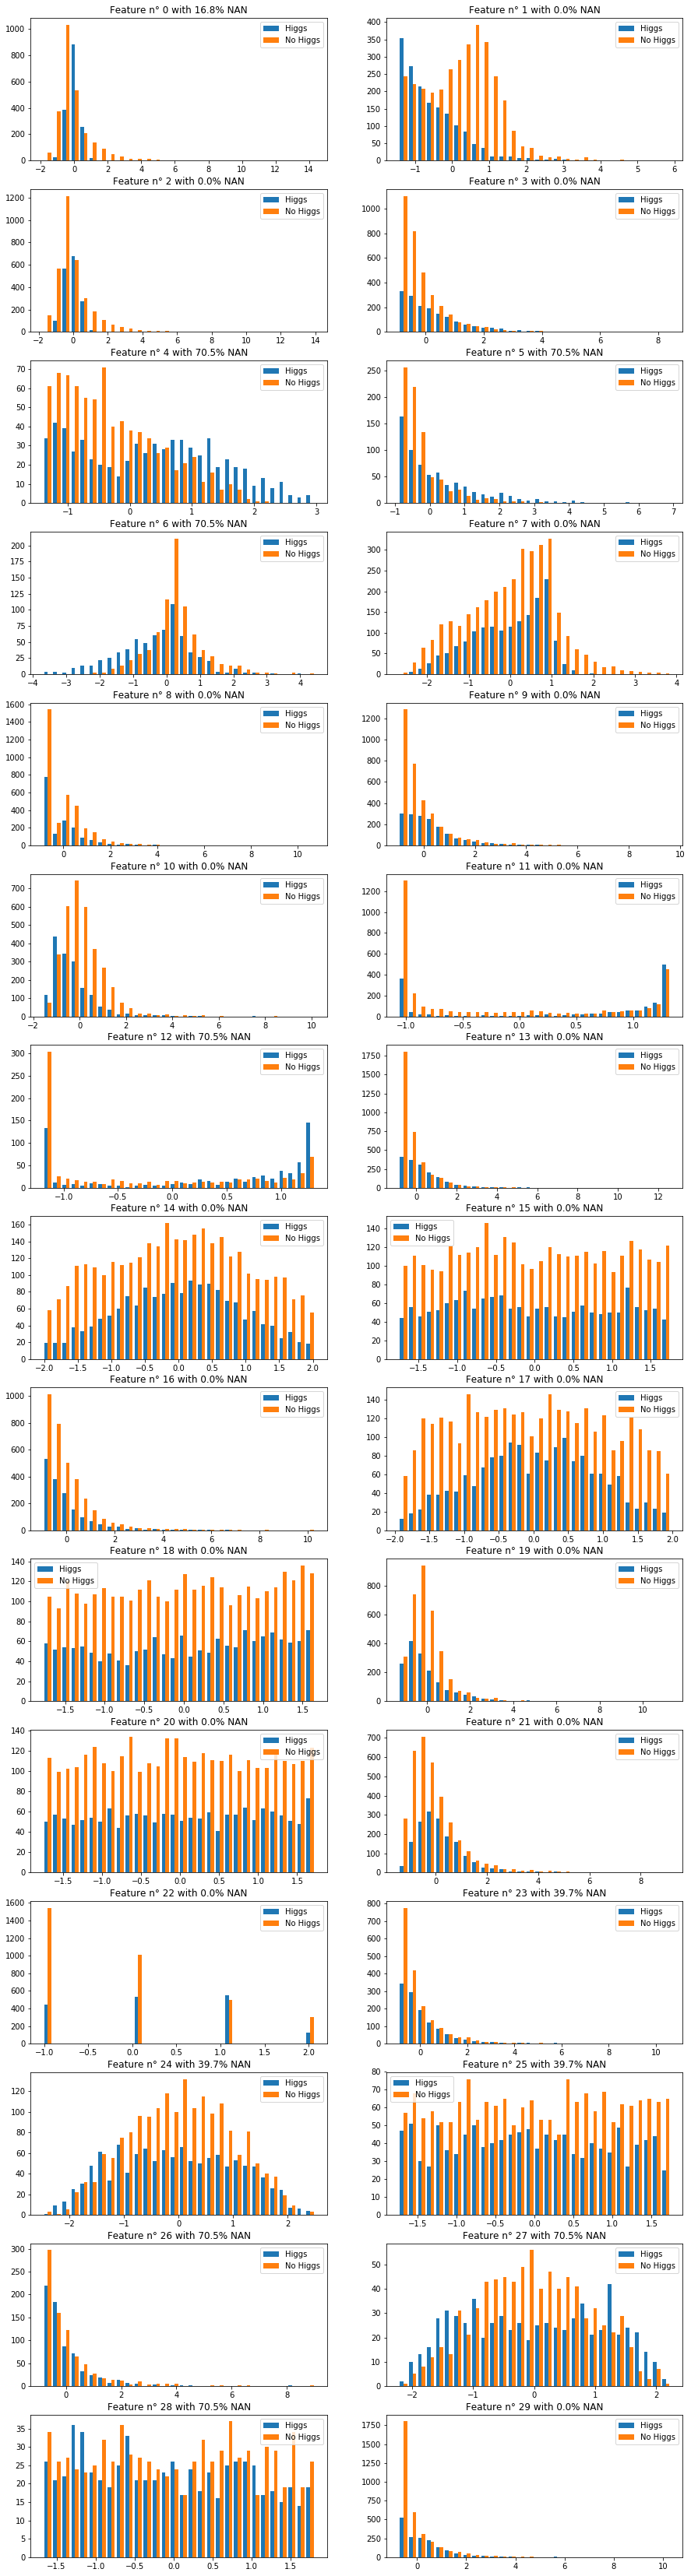

In [36]:
display_feature_distribution(y, tx_nan_norm, 30)

#### Missing Data

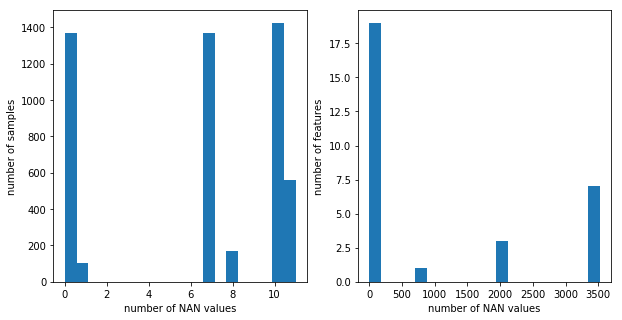

In [37]:
NAN_values_overview(tx_nan_norm, 20)

### Modify Feature Distribution 

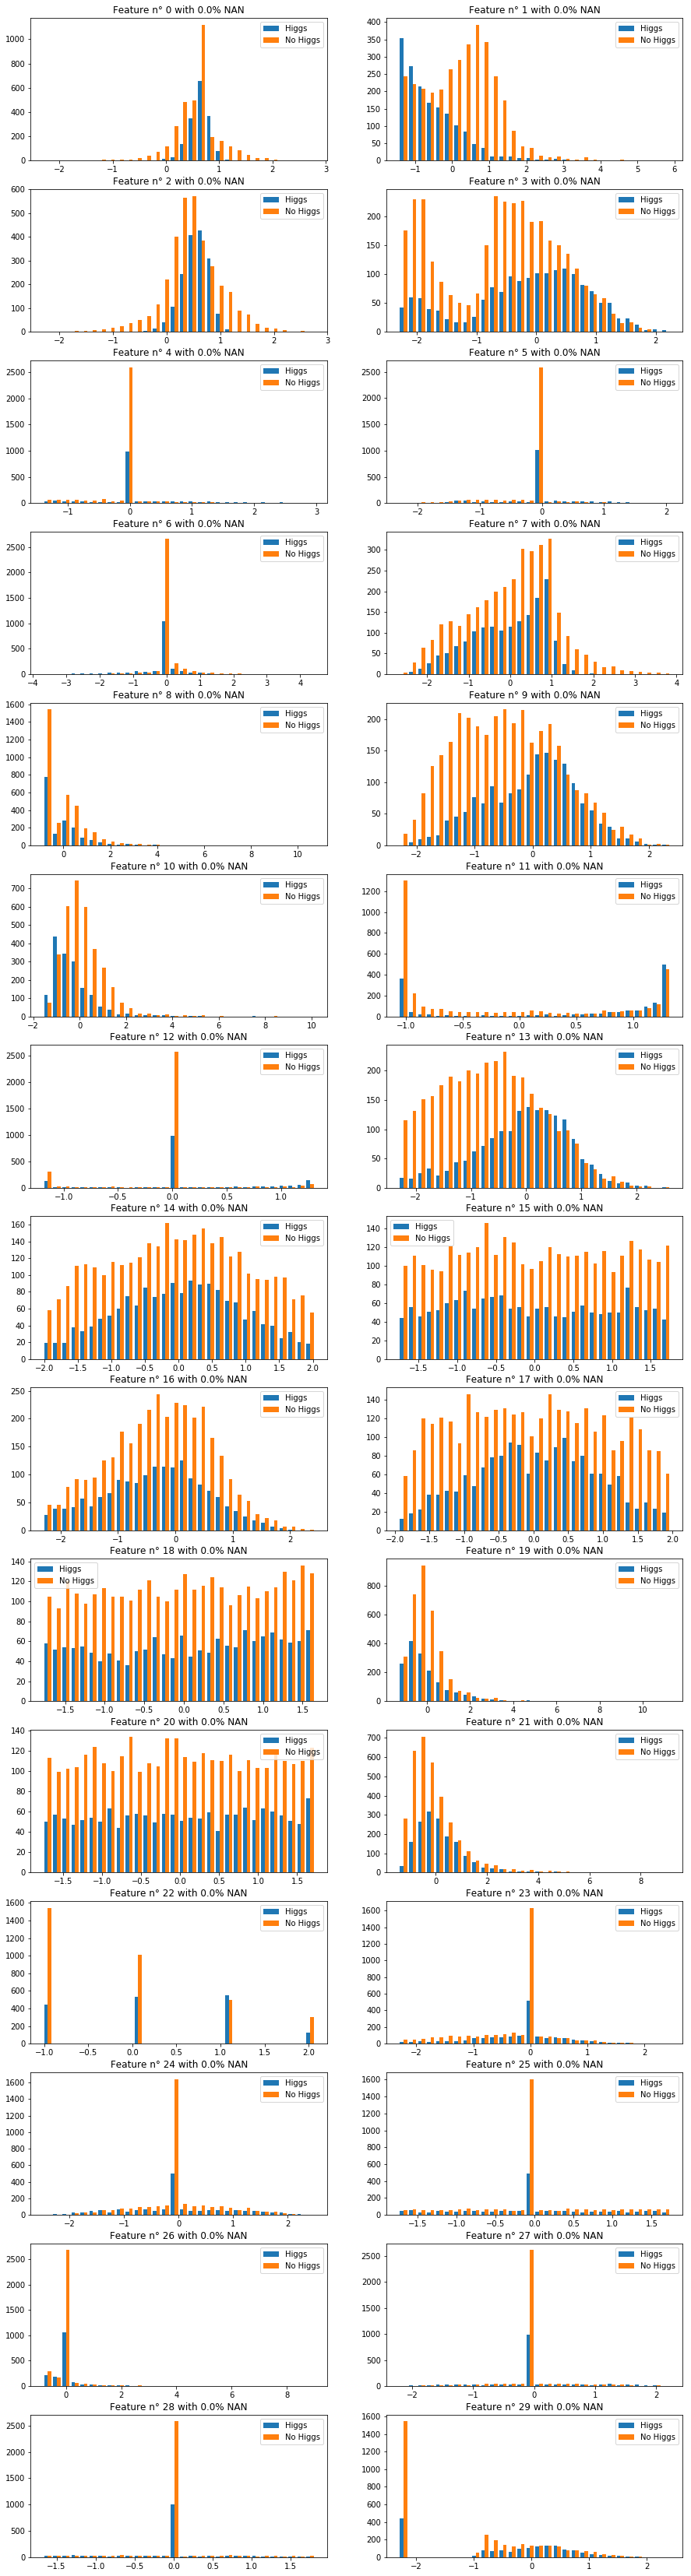

In [38]:
tx_0_norm = transform_nan_to_zero(tx_nan_norm)
features = [0, 2, 3, 5, 9, 13, 16, 23, 29]
tx_0_norm_adjusted = transfom_feature_log(tx_0_norm, features)
display_feature_distribution(y, tx_0_norm_adjusted, 30)

### Clean Dataset

With a first glance at the data set we see that some features are almost entirely filled with missing data. Lets say the we remove features and samples with more thant 30% of missing values

In [39]:
tx_nan_norm.shape

(5000, 30)

In [40]:
tx_cleaned = tx_nan_norm[:, ~np.isnan(tx_nan_norm).any(axis=0)]
tx_cleaned.shape

(5000, 19)



### Train model 

#### Create Cross-validation datasets

In [41]:
test_indices, train_indices = create_cross_validation_datasets(tx.shape[0],4)

#### Least Square Gradient Descent
Linear regression using gradient descent

In [42]:
#initialise le w initial à 30 dim à 0
initial_w_gd = np.zeros(19)
max_iters = 20
gamma = 0.16
gd_losses, gd_ws = gradient_descent(y, tx_cleaned, initial_w_gd, max_iters, gamma)

Gradient Descent(0/19): loss=1.0, w0=-0.053623058553363155, w1=-0.00407633244791181
Gradient Descent(1/19): loss=0.9332470433432256, w0=-0.08837426902698067, w1=-0.005458697465697526
Gradient Descent(2/19): loss=0.9070972913006766, w0=-0.11400617244454996, w1=-0.006477716043977308
Gradient Descent(3/19): loss=0.8899857448058112, w0=-0.13355867384179573, w1=-0.00773515804001754
Gradient Descent(4/19): loss=0.8775424991958626, w0=-0.1487858946078074, w1=-0.009442685131442384
Gradient Descent(5/19): loss=0.8681951023429014, w0=-0.16086712708572756, w1=-0.011649175398568051
Gradient Descent(6/19): loss=0.8610276597232612, w0=-0.17062148100363195, w1=-0.014324733640043635
Gradient Descent(7/19): loss=0.8553865811053598, w0=-0.17862689042566385, w1=-0.01740462097884535
Gradient Descent(8/19): loss=0.8508778495912306, w0=-0.18529692450384316, w1=-0.020813194994847305
Gradient Descent(9/19): loss=0.8472161847300976, w0=-0.19093180353319628, w1=-0.024476381537768512
Gradient Descent(10/19): los

#### Least Square Stochastic Gradient Descent
Linear regression using stochastic gradient descent

In [43]:
#initialise le w initial à 30 dim à 0
initial_w_sgd = np.zeros(19)
max_iters_sgd = 100
gamma_sgd = 0.16
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx_cleaned, initial_w_sgd,10,  max_iters_sgd, gamma_sgd)

SGD(0/99): loss=0.47952410628983655, w0=-0.04245300913297915, w1=-0.03927753732156928
SGD(1/99): loss=0.5035355277784258, w0=-0.060651691818430956, w1=-0.00398033436093876
SGD(2/99): loss=0.47275295334178336, w0=-0.10037000513830749, w1=0.005999933466503911
SGD(3/99): loss=0.47604818742937904, w0=-0.050621189309285955, w1=0.022888458038328004
SGD(4/99): loss=0.4567109933065889, w0=-0.15517639811704026, w1=-0.036827412739258186
SGD(5/99): loss=0.5360458066995095, w0=-0.14416746994314847, w1=-0.03367452743443742
SGD(6/99): loss=0.5523881508856782, w0=0.034422042962855115, w1=-0.05483083391395836
SGD(7/99): loss=0.4908862087552544, w0=-0.12817425957735462, w1=-0.08590718008719765
SGD(8/99): loss=0.4788509857956497, w0=-0.13130928333428735, w1=-0.13623241892295795
SGD(9/99): loss=0.5675285584236579, w0=-0.0775601485108587, w1=-0.01559456015241624
SGD(10/99): loss=0.44045275472747764, w0=-0.15659350109125736, w1=-0.08538641737089663
SGD(11/99): loss=0.4783468268992222, w0=-0.226435495416942

#### Least Square
Least squares regression using normal equations

In [66]:
weight = least_squares(y, tx_cleaned)
losses = compute_loss(y, tx_cleaned, weight)
print("weights : {0}".format(weight))
print("losses : {0}".format(losses))

weights : [-2.69335639e-01 -2.45785162e-01 -3.24658127e-02  2.53794403e-01
 -3.05226770e-02 -3.93274298e+03 -1.67284585e-01  1.52956109e-01
  7.04304227e+02  9.73081008e-03 -2.89630593e-03  7.12080455e+02
  2.24834185e-02  1.38956528e-02  1.22905535e-01 -6.07065988e-03
 -9.31053962e-02  1.03987302e-01  3.37360795e+03]
losses : 0.39810301392033315


#### Ridge Regression
Ridge regression using normal equations

In [61]:
#for different lambdas
lambdas = np.logspace(-100, 100, 200);
#ridge reggression for different lambda
losses = []
for index, lambda_ in enumerate(lambdas):
    weight = ridge_regression(y, tx_cleaned, lambda_)
    losses.append(compute_loss(y, tx_cleaned, weight))
print(losses)

[0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.39810301392033315, 0.3981030139

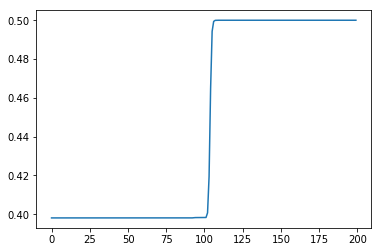

In [64]:
plt.plot(list(range(len(losses))), losses)
plt.show()

#### Logistic Regression
Logistic regression using gradient descent or SGD

#### Reg Logistic Regression
Regularized logistic regression using gradient descent
or SGD